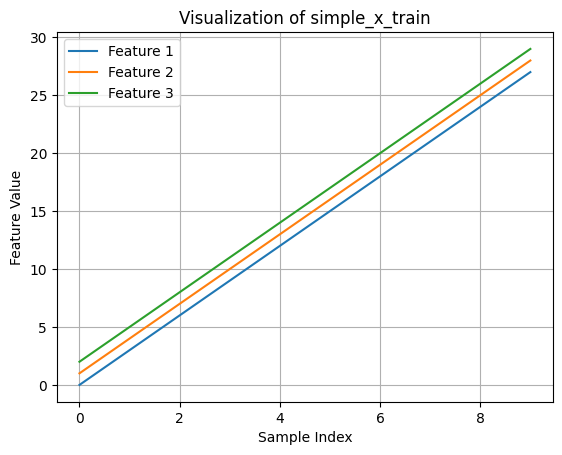

In [8]:
import os
# Disable oneDNN optimizations if you don't want the floating-point precision warning
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Create a simple dataset
simple_x_train = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
    [12, 13, 14],
    [15, 16, 17],
    [18, 19, 20],
    [21, 22, 23],
    [24, 25, 26],
    [27, 28, 29]
])  # Shape: (10, 3)

# Plot the simple_x_train dataset
for i in range(simple_x_train.shape[1]):  # Iterate over each feature (column)
    plt.plot(range(simple_x_train.shape[0]), simple_x_train[:, i], label=f'Feature {i+1}')

plt.title("Visualization of simple_x_train")
plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
simple_y_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # Labels for 10 classes

# Normalize the data
simple_x_train = simple_x_train / 29.0  # Scale values to the range [0, 1]
# Convert it into A one-hot encoded vector is a binary vector where only the index
simple_y_train = to_categorical(simple_y_train)
# Plot the simple_x_train dataset
print("simple_y_train", simple_y_train)

simple_y_train [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0542 - loss: 2.2971      
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1236 - loss: 2.3211     
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0333 - loss: 2.3115     
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1236 - loss: 2.3164     
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0333 - loss: 2.3173     


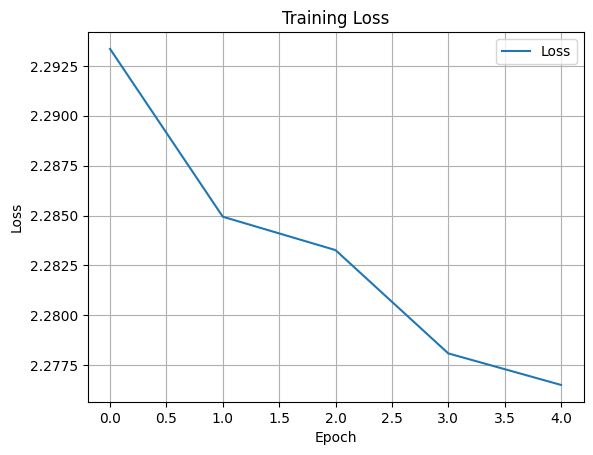

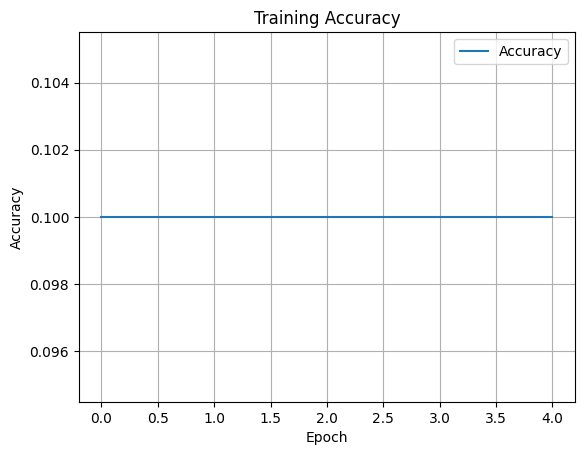

In [11]:
# Define a simple model
model = Sequential([
    Input(shape=(3,)),  # Input shape matches the number of features (3)
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
])
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Train the model and capture the history
history = model.fit(simple_x_train, simple_y_train, epochs=5, batch_size=2, verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




In [4]:
# Second Example
# Load data
#This function loads the MNIST dataset, which contains images of handwritten digits (0–9).
# Cotains 70,0000 images of handwritten digits (60,000 training images+ 10000 testing)
# Each image is 28 × 28 pixels.
#The pixel values of the images range from 0 to 255 (grayscale).
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train: the training images (shape: (60000, 28, 28))
print("x_train contains training images of shape %s  for example %s"%(x_train.shape, x_train[0][5]))
#y_train: the labels (digits 0–9 for training)
print("y_train contains %s labels (digits 0–9 for training) for example %s"%(len(y_train), y_train[0:10]))
#x_test: the testing images (shape: (10000, 28, 28))
print("x_test contains testing images of shape %s  for example %s"%(x_test.shape, x_test[0][5]))
#y_test: the labels (digits 0–9 for testing)
###################################################################
#Dividing by 255 normalizes the values to the range of 0 to 1, 
# which helps the model learn better and faster.
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Normalized x_train contains training images will be %s"%( x_train[0][5]))
print("Normalized x_test contains training images will be %s"%( x_test[0][5]))

# Convert it into A one-hot encoded vector is a binary vector where only the index
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
print("y_train encoded  %s"%(y_train[0:10]))
# Define simple MLP model
model = Sequential([
    Input(shape=(28, 28)), #This defines the input shape of the model. 
    Flatten(), #The Flatten layer reshapes the 2D input (28x28) into a 1D array of 784 elements
    Dense(64, activation='relu'), #The first hidden layer with 64 neurons and ReLU activation function
    Dense(10, activation='softmax') #The output layer with 10 neurons (one for each digit) and softmax activation function
])

model.compile(optimizer='adam', # The Adam optimizer is an adaptive learning rate optimization algorithm 
              loss='categorical_crossentropy', # The loss function used for multi-class classification problems
              metrics=['accuracy']) # The metric used to evaluate the model's performance during training and testing

model.fit(x_train, 
          y_train, 
          epochs=3, # Number of epochs to train the model
          # The batch size is the number of samples processed before the model is updated.
          # A smaller batch size means more updates to the model weights,
          batch_size=128, # The validation split is the fraction of the training data to be used as validation data
          validation_split=0.2) # The validation split is the fraction of the training data to be used as validation data

x_train contains training images of shape (60000, 28, 28)  for example [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]
y_train contains 60000 labels (digits 0–9 for training) for example [5 0 4 1 9 2 1 3 1 4]
x_test contains testing images of shape (10000, 28, 28)  for example [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Normalized x_train contains training images will be [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01176471 0.07058824 0.07058824 0.07058824 0.49411765 0.53333333
 0.68627451 0.10196078 0.65098039 1.         0.96862745 0.49803922
 0.         0.         0.         0.        ]
Normalized x_test contains training images will be [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
y_train encoded  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 